In [ ]:
# Calculates return period rainfall after fitting the provided annual max data into different pdf's

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

def fit_best_distribution(data):
    distributions = ['gamma', 'pearson3', 'lognorm', 'gumbel_r', 'norm']
    best_distribution = None
    best_params = None
    best_ks_statistic = np.inf
    
    for distribution in distributions:
        # Fit the distribution to the data
        params = getattr(stats, distribution).fit(data)
        
        # Perform K-S test
        ks_statistic, p_value = stats.kstest(data, distribution, args=params)

        print(ks_statistic, p_value,distribution)
        
        # Update best distribution if current one has better K-S statistic
        if ks_statistic < best_ks_statistic:
            best_distribution = distribution
            best_params = params
            best_ks_statistic = ks_statistic
    
    return best_distribution, best_params, best_ks_statistic
def rainfall(dist,params,p):
    if dist == 'gamma' :
         return stats.gamma.ppf(p,*params)
    elif dist == 'pearson3' :
         return stats.pearson3.ppf(p,*params)
    elif dist == 'lognorm' :
         return stats.lognorm.ppf(p,*params)
    elif dist == 'gumbel_r' :
         return stats.gumbel_r.ppf(p,*params)
    elif dist == 'norm' :
         return stats.norm.ppf(p,*params)
    
def main():
    # Load rainfall data from CSV file
    data = pd.read_excel(r'gamma_distribution_series.xlsx', usecols=[0]).values.flatten()
    
    # Fit best distribution
    best_distribution, best_params, best_ks_statistic = fit_best_distribution(data)

    # Enter Retun period
    rp =100
    p = 1-(1/rp)

    # Print results
    print("Best Fitted Distribution:", best_distribution)
    print("Parameters of Best Fitted Distribution:", best_params)
    print("K-S Test Statistic Value:", best_ks_statistic)
    print("Rainfall of ",rp,"is",rainfall(best_distribution, best_params,p))

if __name__ == "__main__":
    main()


0.020635641130074267 0.7799360678118629 gamma
0.020635504202067334 0.7799428833448375 pearson3
0.020198902822559428 0.8013634912942651 lognorm
0.036163202921659754 0.14269256775973616 gumbel_r
0.060500084185556746 0.0012657571268821462 norm
Best Fitted Distribution: lognorm
Parameters of Best Fitted Distribution: (0.25537338496763917, -24.170726462817214, 121.91737033236578)
K-S Test Statistic Value: 0.020198902822559428
Rainfall of  100 is 196.6675944307391


In [ ]:
# generate Rainfall hyetograph using the values generated after using IDF

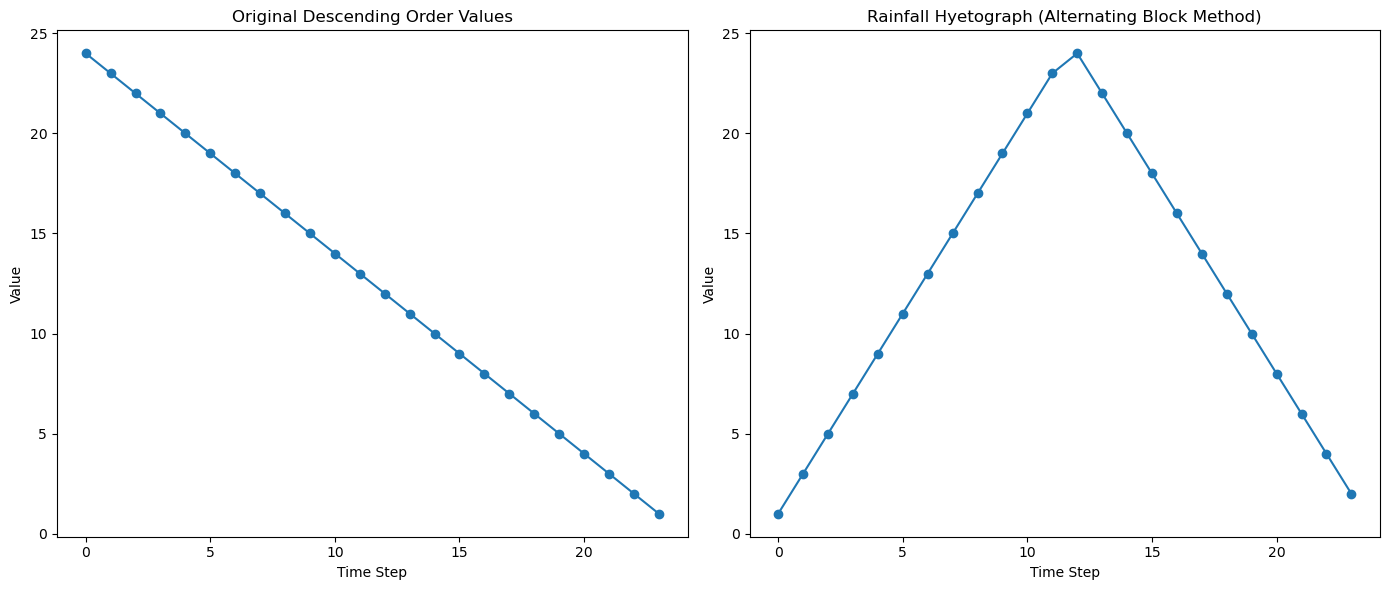

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a descending order list of 24 values
values = np.linspace(24, 1, 24)

# Step 2: Distribute values using the alternating block method
def alternating_block_method(values):
    n = len(values)
    hyetograph = [0] * n
    
    # Center index
    center = n // 2
    
    # Split the values into alternating blocks
    left, right = center - 1, center + 1
    hyetograph[center] = values[0]
    
    for i in range(1, n):
        if i % 2 != 0:  # Alternate placing on left and right
            hyetograph[left] = values[i]
            left -= 1
        else:
            hyetograph[right] = values[i]
            right += 1
    
    return hyetograph

# Rearrange the values using the alternating block method
hyetograph = alternating_block_method(values)

# Step 3: Plot the original and rearranged lists
plt.figure(figsize=(14, 6))

# Original descending values plot
plt.subplot(1, 2, 1)
plt.plot(values, marker='o')
plt.title('Original Descending Order Values')
plt.xlabel('Time Step')
plt.ylabel('Value')

# Rearranged hyetograph plot
plt.subplot(1, 2, 2)
plt.plot(hyetograph, marker='o')
plt.title('Rainfall Hyetograph (Alternating Block Method)')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
